# Etapes 1 et 2: Data from the Random Persist gating strategy

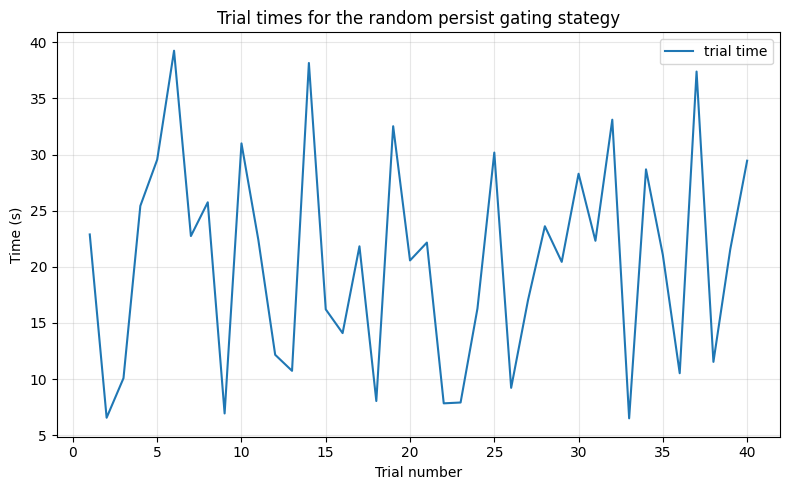

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import glob

file_path = "TrialDurations_randomPersist.txt"

all_trials = []

with open(file_path, "r") as f:
    all_trials = [float(line.strip()) for line in f if line.strip()]

data_randomP = np.array(all_trials)

trials = np.arange(1, data_randomP.shape[0] + 1)

plt.figure(figsize=(8, 5))
plt.plot(trials, data_randomP, label="trial time", color="C0")

plt.xlabel("Trial number")
plt.ylabel("Time (s)")
plt.title("Trial times for the random persist gating stategy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# compute median, quartile 1, and quartile 3
median_time = np.median(data)
q1_time = np.percentile(data, 25)
q3_time = np.percentile(data, 75)

print("Random persist trial durtions: ")
print("Median: ", median_time)
print("25th percentile: ", q1_time)
print("75th percentile: ", q3_time)

Random persist trial durtions: 
Median:  35.63465762138367
25th percentile:  22.916040658950806
75th percentile:  57.10623770952225


# Etape 6: Q-values<br> Generating the average Q-values across all seeds

In [20]:
import pickle

file_paths = sorted(glob.glob("*.pkl"))

q_tables = []

for file in file_paths:
    with open(file, "rb") as f:
        q = pickle.load(f)
        q_tables.append(q)

states = sorted(q_tables[0].keys())

q_mean = {}
for state in states:
    all_qs = []
    for q in q_tables:
        if state in q:
            all_qs.append(q[state])
            q_mean[state] = np.mean(all_qs, axis=0)

for i in range(4):
    print("Example state:", states[i])
    print("Mean Q-values:", q_mean[states[i]])

print("State '00002'")
print("Mean Q-values:", q_mean['00002'])

print("State '00072'")
print("Mean Q-values:", q_mean['00072'])

print("State '00000'")
print("Mean Q-values:", q_mean['00000'])

print("State '00070'")
print("Mean Q-values:", q_mean['00070'])

print("State '11101'")
print("Mean Q-values:", q_mean['11101'])

print("State '11171'")
print("Mean Q-values:", q_mean['11171'])

Example state: 
Mean Q-values: [0.5  0.09]
Example state: 00000
Mean Q-values: [0.99941692 1.10317686]
Example state: 00001
Mean Q-values: [0.57623863 0.55240419]
Example state: 00002
Mean Q-values: [0.36028811 0.41152139]
State '00002'
Mean Q-values: [0.36028811 0.41152139]
State '00072'
Mean Q-values: [0.36222706 0.41556849]
State '00000'
Mean Q-values: [0.99941692 1.10317686]
State '00070'
Mean Q-values: [1.10976456 1.03668722]
State '11101'
Mean Q-values: [-0.88327389 -1.39716876]
State '11171'
Mean Q-values: [-1.09773849 -1.28663101]


# Etape 7: Data from the Q-learning gating strategy

seed0_TrialDurations_qlearning.txt
seed1_TrialDurations_qlearning.txt
seed2_TrialDurations_qlearning.txt
seed3_TrialDurations_qlearning.txt
seed4_TrialDurations_qlearning.txt
seed5_TrialDurations_qlearning.txt
seed6_TrialDurations_qlearning.txt
seed7_TrialDurations_qlearning.txt
seed8_TrialDurations_qlearning.txt
seed9_TrialDurations_qlearning.txt


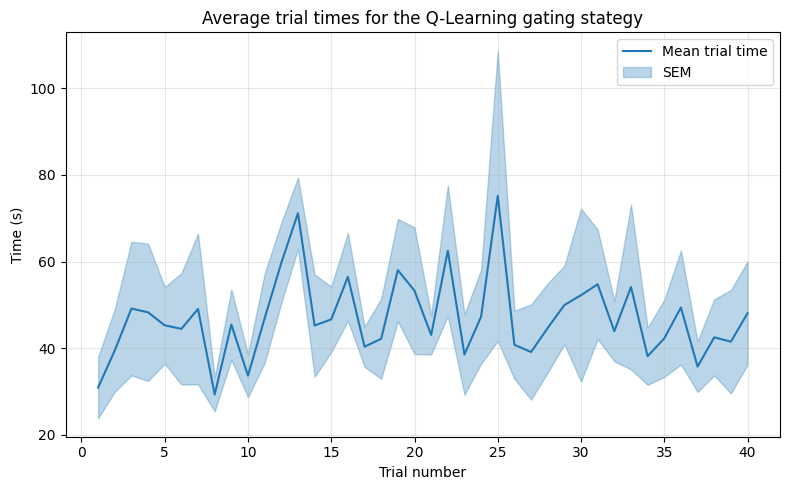

In [21]:
import glob

file_paths = sorted(glob.glob("*.txt"))

all_trials = []

for file in file_paths:
    if "qlearning" in file:
        print(file)
        with open(file, "r") as f:
            trial_times = [float(line.strip()) for line in f if line.strip()]
            all_trials.append(trial_times)

data = np.array(all_trials) 

mean_time = np.mean(data, axis=0)
sem_time = np.std(data, axis=0, ddof=1) / np.sqrt(data.shape[0])

trials = np.arange(1, data.shape[1] + 1)

plt.figure(figsize=(8, 5))
plt.plot(trials, mean_time, label="Mean trial time", color="C0")
plt.fill_between(trials, mean_time - sem_time, mean_time + sem_time,
                 color="C0", alpha=0.3, label="SEM")

plt.xlabel("Trial number")
plt.ylabel("Time (s)")
plt.title("Average trial times for the Q-Learning gating stategy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

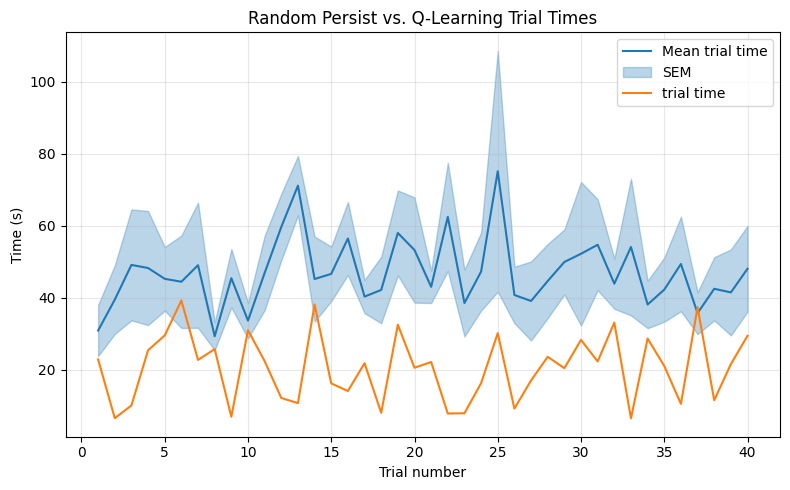

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(trials, mean_time, label="Mean trial time")
plt.fill_between(trials, mean_time - sem_time, mean_time + sem_time,
                 color="C0", alpha=0.3, label="SEM")

trials = np.arange(1, data_randomP.shape[0] + 1)
plt.plot(trials, data_randomP, label="trial time")

plt.xlabel("Trial number")
plt.ylabel("Time (s)")
plt.title("Random Persist vs. Q-Learning Trial Trial Times")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

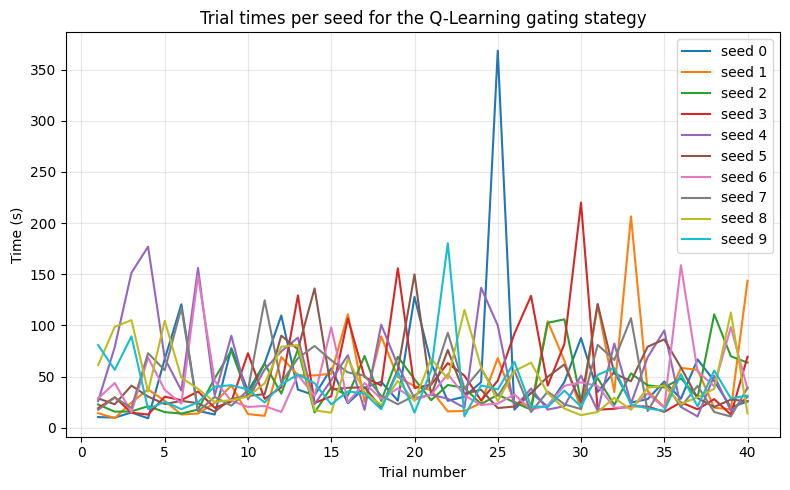

In [23]:
plt.figure(figsize=(8, 5))
for i in range(len(data)):
    plt.plot(trials, data[i], label="seed "+str(i))

plt.xlabel("Trial number")
plt.ylabel("Time (s)")
plt.title("Trial times per seed for the Q-Learning gating stategy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
first10trials = mean_time[0:10]

median_time = np.median(first10trials)
q1_time = np.percentile(first10trials, 25)
q3_time = np.percentile(first10trials, 75)

print("Q-learning first 10 trials duration")
print("Median: ", median_time)
print("25th percentile: ", q1_time)
print("75th percentile: ", q3_time)


last10trials = mean_time[30:40]

median_time = np.median(last10trials)
q1_time = np.percentile(last10trials, 25)
q3_time = np.percentile(last10trials, 75)

print("Q-learning last 10 trials duration")
print("Median: ", median_time)
print("25th percentile: ", q1_time)
print("75th percentile: ", q3_time)

Q-learning first 10 trials duration
Median:  44.867052137851715
25th percentile:  35.11361702084541
75th percentile:  47.568386846780776
Q-learning last 10 trials duration
Median:  43.212720370292665
25th percentile:  41.68889576792717
75th percentile:  49.064426028728484
